## Imports:

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import matplotlib.pyplot as plt

## Data Preparation:

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## Try to build your own convolutional neural network in keras. Use 2D convolutional and max pooling layers for the first part of the network, use two of each. Use a flatten layer and a dropout layer before passing it to dense layer with softmax as output. Here is some documentation on these things that might help:

* https://keras.io/api/layers/core_layers/input/
* https://keras.io/api/layers/convolution_layers/convolution2d/
* https://keras.io/api/layers/pooling_layers/max_pooling2d/
* https://keras.io/api/layers/reshaping_layers/flatten/


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32,(5,5), activation = 'relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        layers.Conv2D(24,(5,5), activation = 'relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        layers.Flatten(data_format=None),
        layers.Dropout(rate = 0.65, noise_shape=None, seed=None),
        layers.Dense(2, activation="relu")
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 24)            │          19,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 24)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,826 (81.35 KB)

 Trainable params: 20,826 (81.35 KB)

 Non-trainable params: 0 (0.00 B)

## Use the keras compile and fit functions to prepare and train your model.

* https://keras.io/api/models/model_training_apis/

In [4]:
# Compile and fit here
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)




## Use the keras Model evaluate function with our test data to evaluate its preformance. Print the test loss and test accuracy of the model.

In [5]:
#Evaluate here
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=256, epochs=10, validation_split=0.1)




Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 2)

## Evaluating Predictions

### Change the image_index to see its predictions for other images!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Model prediction: 0


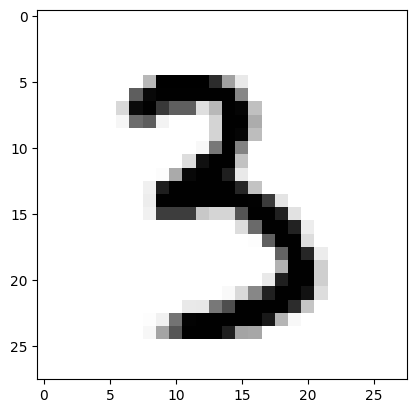

In [6]:
image_index = 32
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(np.array( [x_test[image_index],] ))
print("Model prediction:",pred.argmax())

## Go back through the model code from the earlier sections. Modify the hyperparameters (things like the learning rate, activation function, number of epochs, number of nodes, etc).Try different dropout rates. Addidtionally, add the 'momentum' parameter to our SGD optimizer to see how that effects the preformance.
